# Percolation analysis

 ### Set up

In [1]:
from os import path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from networkx import edge_boundary, nx
from scipy.interpolate import make_interp_spline, interpolate

import config
from config import LEVELS
from create_full_graph_with_single_query import read_or_create_full_graph
from lib.percolation import sampleLinkPercolationWithPercentages

config.set_root_wd()

Working directory: c:\git\pathwayanalysisplatform\proteoformnetworks


 ### Create full interaction Networks with small molecules for Genes, Proteins and Proteoforms

In [2]:
graphs = { l: read_or_create_full_graph(l, True, config.GRAPHS_PATH) for l in LEVELS}


    Reading resources\Reactome\genes_interactions.tsv
    Reading resources\Reactome\genes_vertices.tsv
    Reading resources\Reactome\genes_small_molecules_vertices.tsv
        Graph edges: 457443
        Graph nodes: 12789
        Graph genes nodes: 10804
        Graph small molecule nodes: 1947
    Reading resources\Reactome\proteins_interactions.tsv
    Reading resources\Reactome\proteins_vertices.tsv
    Reading resources\Reactome\proteins_small_molecules_vertices.tsv
        Graph edges: 466752
        Graph nodes: 12903
        Graph proteins nodes: 10902
        Graph small molecule nodes: 1963
    Reading resources\Reactome\proteoforms_interactions.tsv
    Reading resources\Reactome\proteoforms_vertices.tsv
    Reading resources\Reactome\proteoforms_small_molecules_vertices.tsv
        Graph edges: 679747
        Graph nodes: 16040
        Graph proteoforms nodes: 14039
        Graph small molecule nodes: 1963


### Sample completeness vs lcc size

In [3]:
num_completeness_points = 20
num_replicates = 20
step = 0.1

# P = getCompletenessValues(num_completeness_points)
samples = {}
file_name = 'reports/samples_link_percolation_'
for level in LEVELS:
    if path.exists(file_name + level + '.csv'):
        print(f"Reading percolation samples for {level}")
        samples[level] = pd.read_csv(file_name + level + '.csv')
    else:
        print(f'Sampling link percolation for {level}')
        samples[level] = sampleLinkPercolationWithPercentages(graphs[level], num_replicates, step)
        print(f'Creating csv files.')
        samples[level].to_csv(file_name + level + '.csv')
samples

Reading percolation samples for genes
Reading percolation samples for proteins
Reading percolation samples for proteoforms


{'genes':       Unnamed: 0  index  Completeness  Relative Size  Replicate
 0              0      0      0.899998       0.988811          0
 1              1      1      0.809998       0.982699          0
 2              2      2      0.728998       0.975270          0
 3              3      3      0.656097       0.967184          0
 4              4      4      0.590487       0.959003          0
 ...          ...    ...           ...            ...        ...
 2155        2155   2155      0.000009       0.000094         19
 2156        2156   2156      0.000007       0.000094         19
 2157        2157   2157      0.000004       0.000094         19
 2158        2158   2158      0.000002       0.000094         19
 2159        2159   2159      0.000000       0.000094         19
 
 [2160 rows x 5 columns],
 'proteins':       Unnamed: 0  index  Completeness  Relative Size  Replicate
 0              0      0      0.899998       0.996589          0
 1              1      1      0.809998   

### Plot link percolation curves at 3 granularity levels

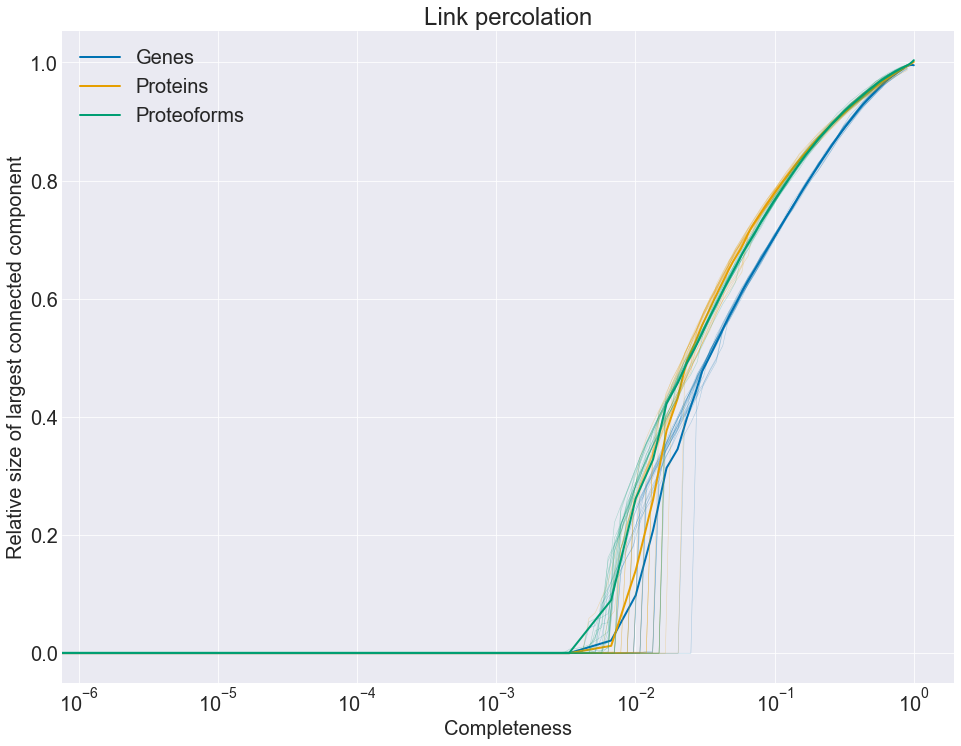

In [4]:
plt.rc('font', size=20)
plt.figure(figsize=(16, 12))
plt.style.use('seaborn-darkgrid')


for level in LEVELS:
    for label, sub_df in samples[level].groupby('Replicate'):
        plt.plot(sub_df['Completeness'], sub_df['Relative Size'], marker='', linewidth=0.5, alpha=0.3, color=config.LEVELS_COLOR[level])

    df_mean = samples[level].groupby('Completeness').mean()
    df_mean = df_mean.reset_index()
    df_mean = df_mean.drop(columns=['Replicate', 'index'])

    x = df_mean['Completeness']
    y = df_mean['Relative Size']
    x_new = np.linspace(0, 1, 300)
    spl = make_interp_spline(x, y)
    y_new = spl(x_new)

    plt.plot(x_new, y_new, marker='', linewidth=2, alpha=1, color=config.LEVELS_COLOR[level], label=level.title())

plt.legend()
plt.xscale('log')
plt.title("Link percolation")
plt.xlabel("Completeness")
plt.ylabel("Relative size of largest connected component")
plt.show()

 ### Create full interaction Networks without small molecules for Genes, Proteins and Proteoforms

In [5]:
graphs_no_sm = {level: read_or_create_full_graph(level, False, config.GRAPHS_PATH, v=False) for level in LEVELS}

    Reading resources\Reactome\genes_interactions.tsv
    Reading resources\Reactome\genes_vertices.tsv
    Reading resources\Reactome\genes_small_molecules_vertices.tsv
        Graph edges: 457443
        Graph nodes: 12789
        Graph genes nodes: 10804
        Graph small molecule nodes: 1947
    Reading resources\Reactome\proteins_interactions.tsv
    Reading resources\Reactome\proteins_vertices.tsv
    Reading resources\Reactome\proteins_small_molecules_vertices.tsv
        Graph edges: 466752
        Graph nodes: 12903
        Graph proteins nodes: 10902
        Graph small molecule nodes: 1963
    Reading resources\Reactome\proteoforms_interactions.tsv
    Reading resources\Reactome\proteoforms_vertices.tsv
    Reading resources\Reactome\proteoforms_small_molecules_vertices.tsv
        Graph edges: 679747
        Graph nodes: 16040
        Graph proteoforms nodes: 14039
        Graph small molecule nodes: 1963


### Sample completeness vs lcc size

In [16]:
num_replicates = 20
step = 0.1

# P = getCompletenessValues(num_completeness_points)
samples = {}
file_name = 'reports/samples_link_percolation_no_sm_'
for level in LEVELS:
    if path.exists(file_name + level + '.csv'):
        print(f"Reading percolation samples for {level}")
        samples[level] = pd.read_csv(file_name + level + '.csv')
    else:
        print(f'Sampling link percolation for {level}')
        samples[level] = sampleLinkPercolationWithPercentages(graphs_no_sm[level], num_replicates, step)
        print(f'Creating csv files.')
        samples[level].to_csv(file_name + level + '.csv')
samples

Reading percolation samples for genes
Reading percolation samples for proteins
Reading percolation samples for proteoforms


{'genes':       Unnamed: 0  index  Completeness  Relative Size  Replicate
 0              0      0      0.899998       0.990127          0
 1              1      1      0.809998       0.983545          0
 2              2      2      0.728998       0.975176          0
 3              3      3      0.656097       0.965303          0
 4              4      4      0.590487       0.955148          0
 ...          ...    ...           ...            ...        ...
 2155        2155   2155      0.000009       0.000094         19
 2156        2156   2156      0.000007       0.000094         19
 2157        2157   2157      0.000004       0.000094         19
 2158        2158   2158      0.000002       0.000094         19
 2159        2159   2159      0.000000       0.000094         19
 
 [2160 rows x 5 columns],
 'proteins':       Unnamed: 0  index  Completeness  Relative Size  Replicate
 0              0      0      0.899998       0.995452          0
 1              1      1      0.809998   

### Plot link percolation curves at 3 granularity levels

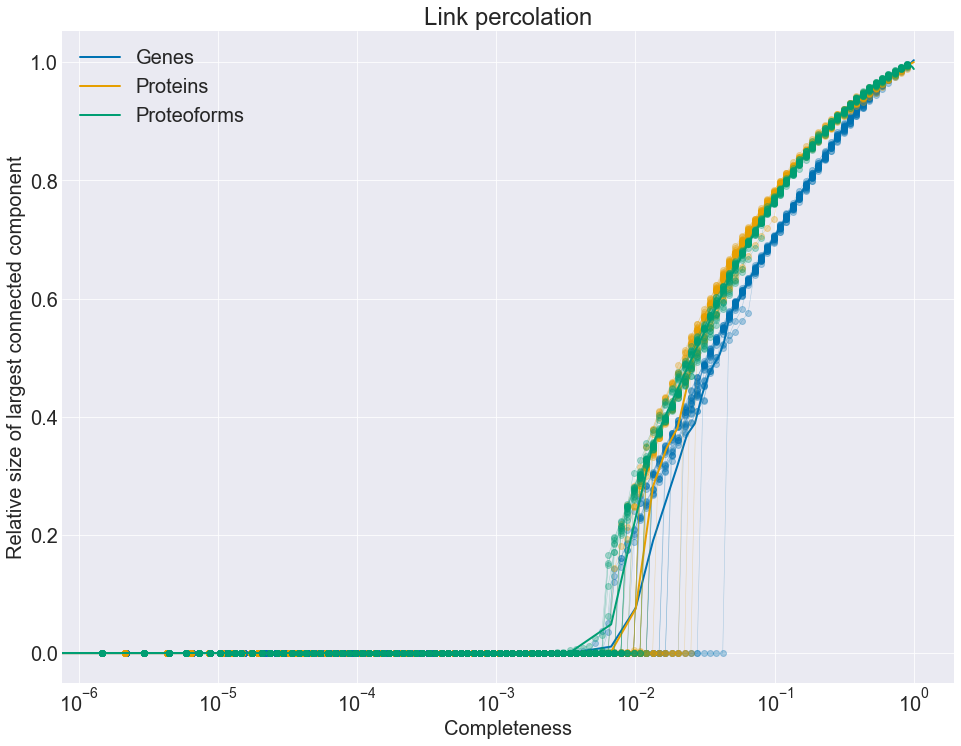

In [17]:
plt.rc('font', size=20)
plt.figure(figsize=(16, 12))
plt.style.use('seaborn-darkgrid')


for level in LEVELS:
    for label, sub_df in samples[level].groupby('Replicate'):
        plt.plot(sub_df['Completeness'], sub_df['Relative Size'], marker='o', linewidth=0.5, alpha=0.3, color=config.LEVELS_COLOR[level])

    df_mean = samples[level].groupby('Completeness').mean()
    df_mean = df_mean.reset_index()
    df_mean = df_mean.drop(columns=['Replicate', 'index'])

    x = df_mean['Completeness']
    y = df_mean['Relative Size']
    x_new = np.linspace(0, 1, 300)
    spl = make_interp_spline(x, y)
    y_new = spl(x_new)

    plt.plot(x_new, y_new, marker='', linewidth=2, alpha=1, color=config.LEVELS_COLOR[level], label=level.title())

plt.legend()
plt.xscale('log')
plt.title("Link percolation")
plt.xlabel("Completeness")
plt.ylabel("Relative size of largest connected component")
plt.show()


### Calculate subgraphs separating mm, um, uu

In [8]:
nodes_mm = [node for node in graphs['proteoforms'].nodes if ';' in str(node)]
nodes_uu = [node for node in graphs['proteoforms'].nodes if not ';' in str(node)]
edges_um = edge_boundary(graphs['proteoforms'], nodes_mm, nodes_uu)

subgraphs = dict()
subgraphs['mm'] = graphs['proteoforms'].subgraph(nodes_mm).copy(as_view=False)
subgraphs['uu'] = graphs['proteoforms'].subgraph(nodes_uu).copy(as_view=False)
subgraphs['um'] = nx.Graph()
subgraphs['um'].add_edges_from(edges_um)

print(f"Total edges: {graphs['proteoforms'].number_of_edges()}, total nodes: {graphs['proteoforms'].number_of_nodes()}")
print(f"mm: edges: {subgraphs['mm'].number_of_edges()}, vertices: {subgraphs['mm'].number_of_nodes()}" )
print(f"uu: edges: {subgraphs['uu'].number_of_edges()}, vertices: {subgraphs['uu'].number_of_nodes()}" )
print(f"um: edges: {subgraphs['um'].number_of_edges()}, vertices: {subgraphs['um'].number_of_nodes()}" )

Total edges: 679747, total nodes: 16040
mm: edges: 140823, vertices: 3135
uu: edges: 445850, vertices: 12905
um: edges: 93074, vertices: 8257


### Sample completeness vs lcc size for mm, uu, mu

In [9]:
num_replicates = 3
step = 0.1

samples = {}
file_name = 'reports/samples_link_percolation_'
subnames = ['mm', 'uu', 'um']
for name in subnames:
    if path.exists(file_name + name + '.csv'):
        print(f"Reading percolation samples for {name}")
        samples[name] = pd.read_csv(file_name + name + '.csv')
    else:
        print(f'Sampling link percolation for {name}')
        samples[name] = sampleLinkPercolationWithPercentages(subgraphs[name], num_replicates, step)
        print(f'Creating csv files.')
        samples[name].to_csv(file_name + name + '.csv')
samples

Reading percolation samples for mm
Reading percolation samples for uu
Reading percolation samples for um


{'mm':      Unnamed: 0  index  Completeness  Relative Size  Replicate
 0             0      0      0.899995       0.985500          0
 1             1      1      0.809996       0.971517          0
 2             2      2      0.728993       0.947178          0
 3             3      3      0.656093       0.931124          0
 4             4      4      0.590479       0.919213          0
 ..          ...    ...           ...            ...        ...
 286         286    286      0.000028       0.000518          2
 287         287    287      0.000021       0.000518          2
 288         288    288      0.000014       0.000518          2
 289         289    289      0.000007       0.000518          2
 290         290    290      0.000000       0.000518          2
 
 [291 rows x 5 columns],
 'uu':      Unnamed: 0  index  Completeness  Relative Size  Replicate
 0             0      0      0.900000       0.994582          0
 1             1      1      0.809999       0.989404          0
 

### Plot link percolation curves for mm, uu and um

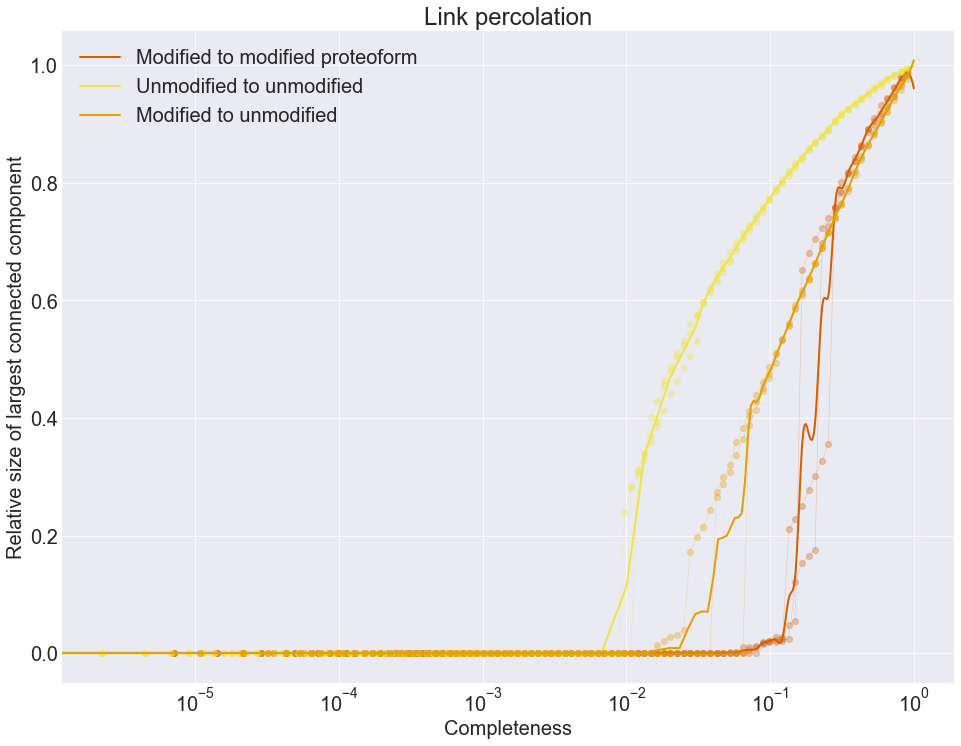

In [14]:
plt.rc('font', size=20)
plt.figure(figsize=(16, 12))
plt.style.use('seaborn-darkgrid')

labels = {'mm': 'Modified to modified proteoform',
          'uu': 'Unmodified to unmodified',
          'um': 'Modified to unmodified'}

for name in subnames:
    for label, sub_df in samples[name].groupby('Replicate'):
        plt.plot(sub_df['Completeness'], sub_df['Relative Size'], marker='o',
                 linewidth=0.5, alpha=0.3, color=config.PROTEOFORMS_SUBGRAPHS_COLOR[name])

    df_mean = samples[name].groupby('Completeness').mean()
    df_mean = df_mean.reset_index()
    df_mean = df_mean.drop(columns=['Replicate', 'index'])

    x = df_mean['Completeness']
    y = df_mean['Relative Size']
    x_new = np.linspace(0, 1, 300)
    spl = make_interp_spline(x, y)
    y_new = spl(x_new)

    plt.plot(x_new, y_new, marker='',
             linewidth=2, alpha=1, color=config.PROTEOFORMS_SUBGRAPHS_COLOR[name], label=labels[name])

plt.legend()
plt.xscale('log')
plt.title("Link percolation")
plt.xlabel("Completeness")
plt.ylabel("Relative size of largest connected component")
plt.show()

# Disease Modules

### Create modules

### Plot relative size of lcc for each disease module

# TODO: Make scatter plot where each dot is a disease.
#  Number of genes (x) VS Observed module size (y)
# The observed module size is the number of vertices in the lcc of the disease module

